In [1]:
import os
import numpy as np
import pandas as pd
import datetime
from PIL import Image, ImageEnhance, ImageOps

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data_path = r"C:\Users\admins\Desktop\project_DL\archive\train"

In [3]:
emotions = ['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

In [4]:
image_counts = {}

In [5]:
for emotion in emotions:
    emotion_folder = os.path.join(train_data_path, emotion)
    if os.path.exists(emotion_folder):
        image_counts[emotion] = len([file for file in os.listdir(emotion_folder) if file.endswith(('.jpg', '.png'))])
    else:
        image_counts[emotion] = 0

In [6]:
print(image_counts)

{'fearful': 4097, 'disgusted': 436, 'angry': 3995, 'neutral': 4965, 'sad': 4830, 'surprised': 3171, 'happy': 7215}


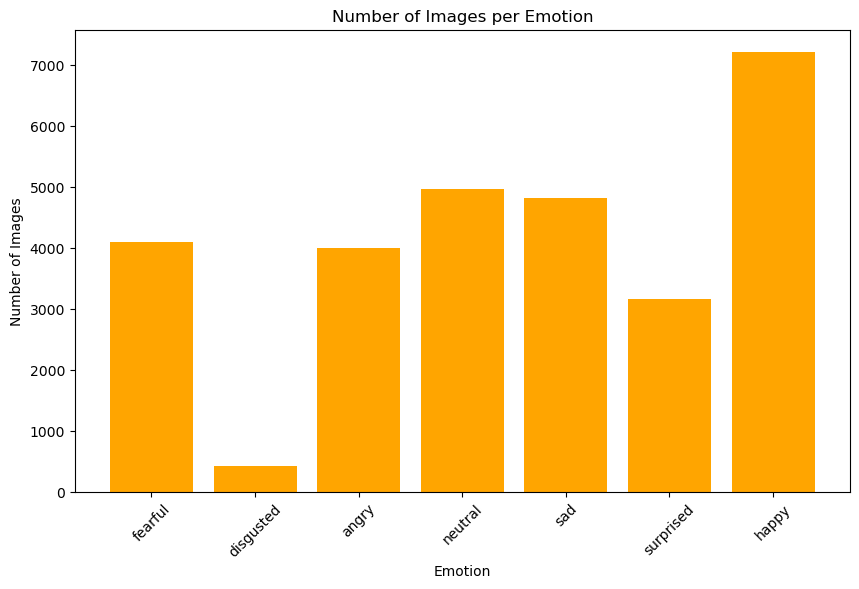

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='orange')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images per Emotion')
plt.xticks(rotation=45)
plt.show()

In [8]:
input_folder = r"C:\Users\admins\Desktop\project_DL\archive\train\disgusted"

In [9]:
# 이미지 증식 함수
def augment_image(image_path):
    # 이미지를 열고 numpy 배열로 변환
    img = Image.open(image_path)

    # 좌우 반전
    flipped_img = ImageOps.mirror(img)
    flipped_img.save(os.path.join(input_folder, "flipped_" + os.path.basename(image_path)))

    # 45도 회전 (여백을 흰색으로 설정)
    rotated_45_img = img.rotate(45, expand=True, fillcolor=255)
    rotated_45_img.save(os.path.join(input_folder, "rotated_45_" + os.path.basename(image_path)))

    # 90도 회전
    rotated_90_img = img.rotate(90, expand=True, fillcolor=255)
    rotated_90_img.save(os.path.join(input_folder, "rotated_90_" + os.path.basename(image_path)))

    # 추가적인 회전 (135도, 180도)
    rotated_135_img = img.rotate(135, expand=True, fillcolor=255)
    rotated_135_img.save(os.path.join(input_folder, "rotated_135_" + os.path.basename(image_path)))

    # 밝기 조정
    enhancer = ImageEnhance.Brightness(img)
    for factor in [0.5, 1.5, 2.0]:  # 밝기 계수
        brightened_img = enhancer.enhance(factor)
        brightened_img.save(os.path.join(input_folder, f"brightened_{factor}_" + os.path.basename(image_path)))

    # 크기 조정
    for scale in [0.5, 1.5, 2.0]:  # 크기 조정 계수
        resized_img = img.resize((int(img.width * scale), int(img.height * scale)))
        resized_img.save(os.path.join(input_folder, f"resized_{scale}_" + os.path.basename(image_path)))

original_image_count = len([file for file in os.listdir(input_folder) if file.endswith(('.jpg', '.png'))])


# 모든 이미지를 증식
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        augment_image(os.path.join(input_folder, filename))

total_image_count = len([file for file in os.listdir(input_folder) if file.endswith(('.jpg', '.png'))])

In [10]:
print(f"Number of original images: {original_image_count}")
print(f"Total number of images after augmentation: {total_image_count}")
print("Image augmentation completed.")

Number of original images: 436
Total number of images after augmentation: 4796
Image augmentation completed.


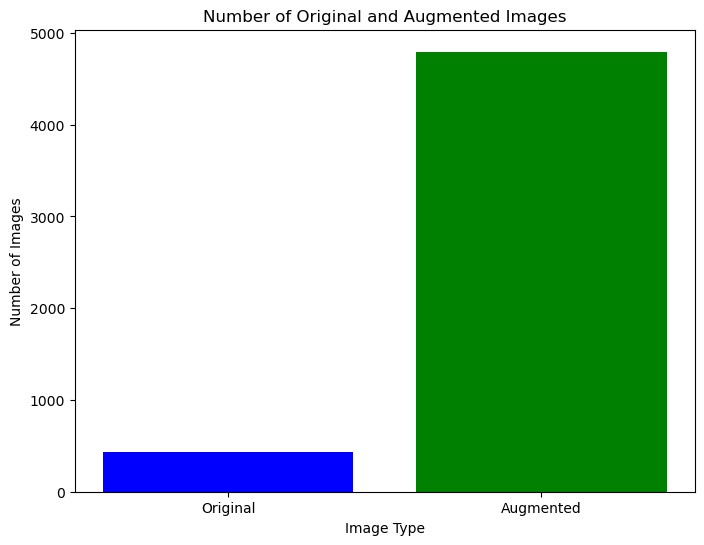

In [11]:
labels = ['Original', 'Augmented']
counts = [original_image_count, total_image_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Image Type')
plt.ylabel('Number of Images')
plt.title('Number of Original and Augmented Images')
plt.show()

In [12]:
train_data_path = r"C:\Users\admins\Desktop\project_DL\archive\train"
emotions = ['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

In [13]:
# 감정별 이미지 개수를 저장할 딕셔너리
image_counts = {}

In [14]:
# 각 감정 폴더의 이미지 개수 세기
for emotion in emotions:
    folder_path = os.path.join(train_data_path, emotion)
    image_count = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))])
    image_counts[emotion] = image_count

In [15]:
# 결과 출력
for emotion, count in image_counts.items():
    print(f"Number of {emotion} images: {count}")

Number of fearful images: 4097
Number of disgusted images: 4796
Number of angry images: 3995
Number of neutral images: 4965
Number of sad images: 4830
Number of surprised images: 3171
Number of happy images: 7215


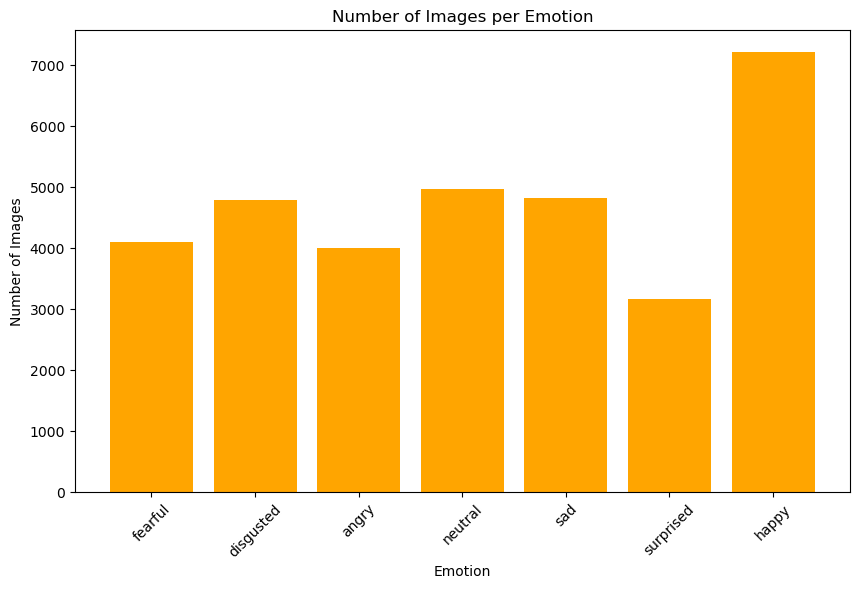

In [16]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='orange')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images per Emotion')
plt.xticks(rotation=45)
plt.show()

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
dropout_n = 0.2

class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        # 첫 번째 콘볼루션 레이어
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(32)
        self.dropout1 = nn.Dropout(dropout_n)  # 드롭아웃 추가

        # 두 번째 콘볼루션 레이어
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(dropout_n)  # 드롭아웃 추가

        # 세 번째 콘볼루션 레이어
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.dropout3 = nn.Dropout(dropout_n)  # 드롭아웃 추가

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 6 * 6, 128)  # 이미지 크기에 맞게 조정
        self.bn4 = nn.BatchNorm1d(128)  # BatchNorm1d로 수정
        self.dropout4 = nn.Dropout(dropout_n)  # 드롭아웃 추가
        self.fc2 = nn.Linear(128, 7)  # 클래스 수에 맞게 수정

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.bn1(self.conv1(x)), 2))
        x = self.dropout1(x)  # 드롭아웃 적용
        x = F.relu(F.max_pool2d(self.bn2(self.conv2(x)), 2))
        x = self.dropout2(x)  # 드롭아웃 적용
        x = F.relu(F.max_pool2d(self.bn3(self.conv3(x)), 2))
        x = self.dropout3(x)  # 드롭아웃 적용
        x = x.view(-1, 128 * 6 * 6)
        x = F.relu(self.bn4(self.fc1(x)))
        x = self.dropout4(x)  # 드롭아웃 적용
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [3]:
train_data_path = r'C:\Users\user\Desktop\hyunhee\learning\deeplearning\project_team\emotion\train'

In [4]:
# 데이터 전처리 및 로딩
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.Grayscale(),
    transforms.ToTensor()
# Normalizing to [-1, 1]
])

In [5]:
# train 데이터셋
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)
# 평균과 표준편차 계산
loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), num_workers=1)
data = next(iter(loader))
images = data[0]
mean = torch.mean(images)
std = torch.std(images)


print(f"Mean: {mean}")
print(f"Std: {std}")

Mean: 0.5200318694114685
Std: 0.2631237804889679


In [6]:
# 데이터 전처리 및 로딩
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.Resize((48, 48)),
    transforms.Normalize((0.52,), (0.26,))  # Normalizing to [-1, 1]
])

In [7]:
# 데이터셋 정의 (경로 수정 필요)
train_dataset = datasets.ImageFolder(root=r'C:\Users\user\Desktop\hyunhee\learning\deeplearning\project_team\emotion\train', transform=transform)
test_dataset = datasets.ImageFolder(root=r'C:\Users\user\Desktop\hyunhee\learning\deeplearning\project_team\emotion\test', transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [8]:
model = myCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5, weight_decay=0.001)

In [9]:
# 훈련 및 테스트 함수
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

In [10]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_accuracies.append(100. * correct / len(train_loader.dataset))
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Accuracy: {100. * correct / len(train_loader.dataset):.2f}%')

In [11]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)
    print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

#### CNN / SGD
- lr=0.01
- momentum=0.5
- weight_decay=0.001
- dropout : 0.2
- batchNorm
- epoch : 20번
- 정규화 : 0.52, 0.26

In [12]:
import time

# 전체 훈련 시간 측정 시작
start_time = time.time()

# 모델 훈련
for epoch in range(20):
    start_epoch = time.time()  # 각 epoch 시작 시간 측정
    train(model, train_loader, optimizer, epoch)  # 훈련
    test(model, test_loader)  # 테스트
    elapsed_time = time.time() - start_epoch  # 각 epoch 소요 시간 계산
    print(f"Epoch {epoch + 1} time: {elapsed_time:.2f} seconds")
     

# 전체 소요 시간 계산
total_elapsed_time = time.time() - start_time
print(f"Total elapsed time: {total_elapsed_time:.2f} seconds")

Epoch 1, Train Loss: 1.6010, Accuracy: 38.77%
Test Loss: 1.5187, Accuracy: 42.53%
Epoch 1 time: 47.59 seconds
Epoch 2, Train Loss: 1.3778, Accuracy: 48.37%
Test Loss: 1.4008, Accuracy: 46.71%
Epoch 2 time: 47.67 seconds
Epoch 3, Train Loss: 1.2701, Accuracy: 52.52%
Test Loss: 1.3159, Accuracy: 49.39%
Epoch 3 time: 47.74 seconds
Epoch 4, Train Loss: 1.1981, Accuracy: 55.38%
Test Loss: 1.2284, Accuracy: 52.38%
Epoch 4 time: 48.00 seconds
Epoch 5, Train Loss: 1.1465, Accuracy: 57.22%
Test Loss: 1.2735, Accuracy: 52.58%
Epoch 5 time: 48.51 seconds
Epoch 6, Train Loss: 1.0990, Accuracy: 59.34%
Test Loss: 1.1665, Accuracy: 54.92%
Epoch 6 time: 48.24 seconds
Epoch 7, Train Loss: 1.0601, Accuracy: 60.77%
Test Loss: 1.1414, Accuracy: 56.21%
Epoch 7 time: 48.05 seconds
Epoch 8, Train Loss: 1.0290, Accuracy: 62.12%
Test Loss: 1.1255, Accuracy: 57.06%
Epoch 8 time: 48.29 seconds
Epoch 9, Train Loss: 1.0015, Accuracy: 63.09%
Test Loss: 1.1186, Accuracy: 58.21%
Epoch 9 time: 48.52 seconds
Epoch 10, 

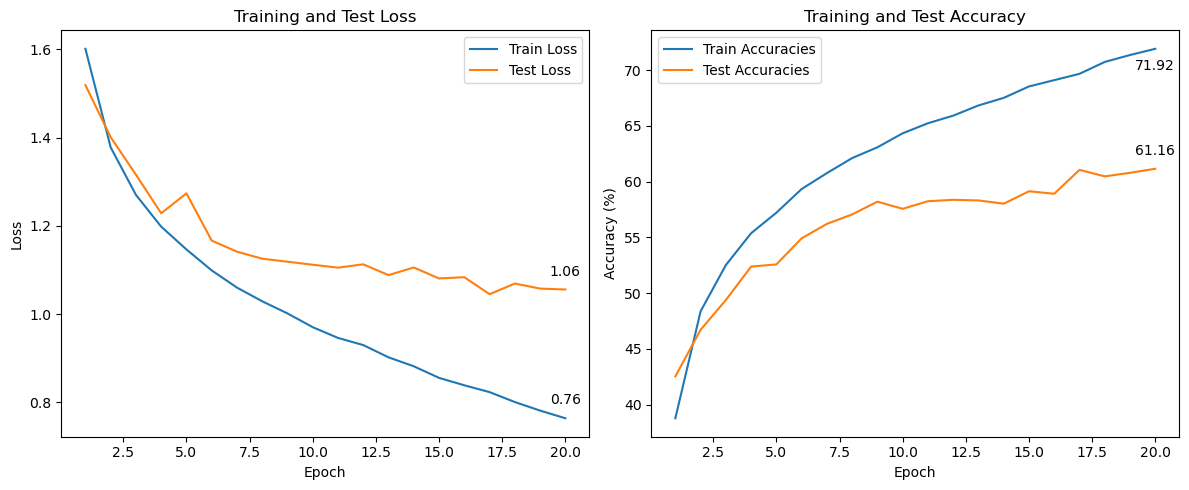

In [17]:
# 손실과 정확도 그래프
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 손실 그래프
axes[0].plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
axes[0].plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].set_title('Training and Test Loss')

axes[0].annotate(f'{train_losses[-1]:.2f}', (len(train_losses), train_losses[-1]), 
                 textcoords="offset points", xytext=(0,10), ha='center')
axes[0].annotate(f'{test_losses[-1]:.2f}', (len(test_losses), test_losses[-1]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

# 정확도 그래프
axes[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracies')
axes[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracies')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].legend()
axes[1].set_title('Training and Test Accuracy')

axes[1].annotate(f'{train_accuracies[-1]:.2f}', (len(train_accuracies), train_accuracies[-1]), 
                 textcoords="offset points", xytext=(0,-15), ha='center')
axes[1].annotate(f'{test_accuracies[-1]:.2f}', (len(test_accuracies), test_accuracies[-1]), 
                 textcoords="offset points", xytext=(0,10), ha='center')
    
plt.tight_layout()
plt.show()

### 타 사진 데이터로 확인

In [166]:
import pandas as pd

image_data = [
    {"path": r"C:\Users\user\Desktop\hyunhee\learning\deeplearning\test_image1.jpg", "original": "happy"},
    {"path": r"C:\Users\user\Desktop\hyunhee\learning\deeplearning\test_image4.jpg", "original": "neutral"},
    {"path": r"C:\Users\user\Desktop\hyunhee\learning\deeplearning\test_image5.jpg", "original": "sad"}
]

In [167]:
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.52,), (0.26,))  # Use the mean and std from your dataset
])

In [168]:
# Put the model in evaluation mode
model.eval()

myCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=4608, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=7, bias=True)
)

In [169]:
results = []

In [170]:
for item in image_data:
    image_path = item["path"]
    
    # Load the image
    image = Image.open(image_path)

    # Preprocess the image
    image = transform(image)
    image = image.unsqueeze(0)  # Add a batch dimension

    # Disable gradient calculation
    with torch.no_grad():
        output = model(image)
        prediction = output.argmax(dim=1, keepdim=True)

    # Map the predicted class index to the class label
    class_names = train_dataset.classes  # Assuming you have the class names in the dataset
    predicted_class = class_names[prediction.item()]

    # Append the result to the list
    results.append({
        "Image Path": image_path,
        "Original Class": item["original"],
        "Predicted Class": predicted_class
    })

In [171]:
results_df = pd.DataFrame(results)

In [173]:
results_df

,Image Path,Original Class,Predicted Class
0,C:\Users\user\Desktop\hyunhee\learning\deeplea...,happy,happy
1,C:\Users\user\Desktop\hyunhee\learning\deeplea...,neutral,neutral
2,C:\Users\user\Desktop\hyunhee\learning\deeplea...,sad,neutral
